# Universidad de Buenos Aires
# Procesamiento de Lenguaje Natural - Desafio: 5
# Alumno: Matias Werbin

In [1]:
!pip uninstall -y tensorflow keras
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.4 MB/s eta 0:00:00


In [2]:
# importacion transformers

!pip install transformers --quiet

In [3]:
# importación de librerias

import tensorflow
from transformers import TFBertModel


## Modelo

In [4]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

bert_model=TFBertModel.from_pretrained("bert-base-uncased") # Bert Base

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [5]:
# Definicion de longitud maxima de secuencia y clases de salida

max_length = 139 # Mediana
output_shape = 3


In [6]:
bert_model.bert.trainable = False # congelamos bert

input_ids = tensorflow.keras.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [7]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')]) # se agrega metrica de validacion f1 score macro dado que el ds a utulizar no esta balanceado

## Dataset

In [8]:
# Descargar dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  131k  100  131k    0     0  31486      0  0:00:04  0:00:04 --:--:-- 87749
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   396k      0  0:00:17  0:00:17 --:--:-- 1876k


In [9]:
import pandas as pd
df=pd.read_csv('/content/reviews.csv')

In [10]:
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [11]:
print(f'La cantidad de criticas disponibles en el dataset reviews : {len(df)}')


average_length = sum([len(x) for x in df['content']]) / len(df['content'])


print(f'En promedio, cada criica tiene un longitud de secuencia de: {round(average_length,0)}')

La cantidad de criticas disponibles en el dataset reviews : 15746
En promedio, cada criica tiene un longitud de secuencia de: 181.0


<ipython-input-12-f30ae207e867>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(scores_count))


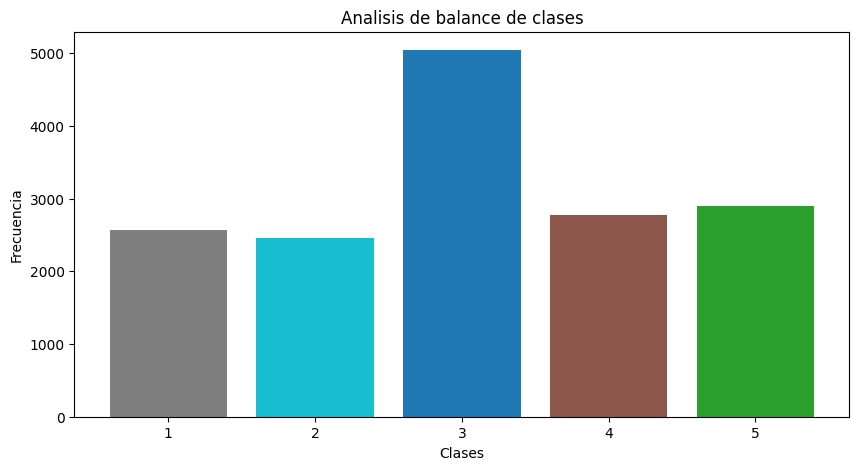

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

scores_count=df['score'].value_counts()

colors = plt.cm.get_cmap('tab10', len(scores_count))

plt.figure(figsize=(10,5))
plt.bar(x=scores_count.index, height=scores_count.values,color=[colors(i) for i in range(len(scores_count))])
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Analisis de balance de clases')
plt.show()

Se puede observar un desbalance de clases. La clase 3 tiene una frecuencia de aparación mayor que el resto de las clases. Ahora un cambio de variable, pasaremos de score a sentiment de esta manera:

- score <= 2 --> sentiment: negative --> new class: 0
- score = 3 --> sentiment: neutral --> new class: 1
- score > 3 --> sentiment: positive --> new class: 2

In [13]:
# Creamos sentiment como nuevo target
df['sentiment']=df['score'].apply(lambda x: '0' if x <=2 else 1 if x==3 else 2)

In [14]:
# Verficamos
df[['score','sentiment']]

,score,sentiment
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
15741,5,2
15742,5,2
15743,5,2
15744,5,2


<ipython-input-15-8e7ef563cc4c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['sentiment'], palette='tab10')


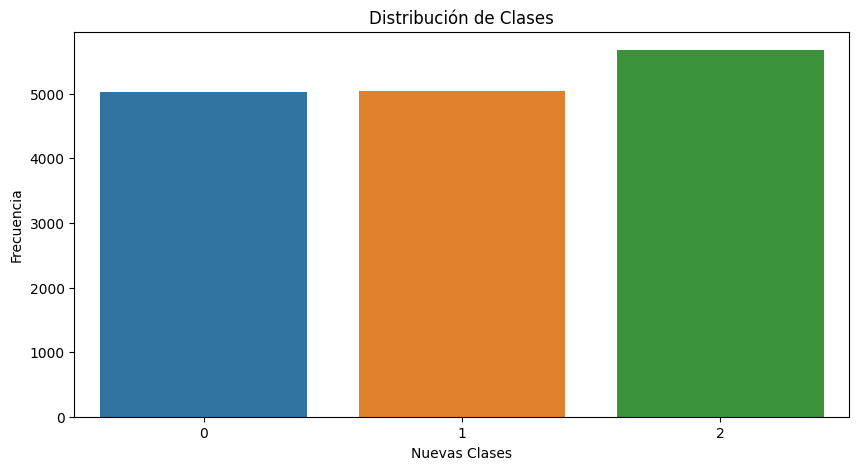

In [15]:
plt.figure(figsize=(10, 5))

# Contar la frecuencia de cada clase en 'sentiment'
ax = sns.countplot(x=df['sentiment'], palette='tab10')

# Rotar las etiquetas del eje X
plt.xticks(rotation=0)

# Etiquetas y título
plt.xlabel('Nuevas Clases')
plt.ylabel('Frecuencia')
plt.title('Distribución de Clases')

plt.show()


Ahora podemos observar que el dataset se encuentra bastante más balanceado

Mediana: 139.0
Media 181.0
Moda ModeResult(mode=4, count=178)


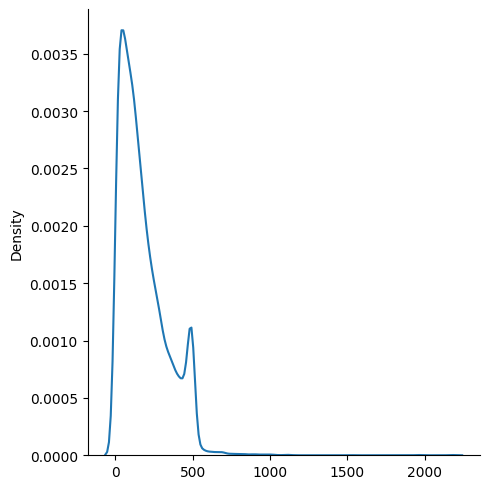

In [16]:
import numpy as np
import scipy.stats as stats

sentences=df.content.values
sentence_lens = [len(sentence) for sentence in sentences]

print("Mediana:", round(np.median(sentence_lens),0))
print('Media', round(np.mean(sentence_lens),0))
print('Moda', stats.mode(sentence_lens))
sns.displot(sentence_lens, kind='kde')

In [17]:
df['sentiment'] # vemos que es una variable categorica ordinal y queremos que sea categorica nominal

,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
15741,2
15742,2
15743,2
15744,2


In [18]:
from tensorflow.keras.utils import to_categorical

y=df['sentiment'].values
y=to_categorical(y)
output_shape=y.shape[1]

In [19]:
# validamos: sabemos del print de la celda que el registro de idx 0 debe ser [1,0,0] y el de inx 15745 [0,0,1]

print(y[:1])
print(y[-1:])


[[1. 0. 0.]]
[[0. 0. 1.]]


Vemos que ahora nuestra target este en formato one hot encoding por lo que la perdida a utilizar debe ser categorical crossentropy

## Tokenizacion y Data generator

In [20]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer

# Descargamos tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [21]:
from sklearn.model_selection import train_test_split

max_length=139 # Valor de Mediana
indices=np.arange(len(sentences))
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.20, random_state=7)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.25, random_state=74)

In [22]:
print(f"Cantidad de muestras en train {idx_train.shape[0]}")
print(f"Cantidad de muestras en valid {idx_val.shape[0]}")
print(f"Cantidad de muestras en test {idx_test.shape[0]}")

Cantidad de muestras en train 9447
Cantidad de muestras en valid 3149
Cantidad de muestras en test 3150


In [23]:
# Funciones de generacion

def convert_data_to_examples(text, labels, idx_train, idx_val):
    """
    Propósito:
    Esta función convierte los datos de texto y etiquetas en "InputExamples" que luego se usarán para alimentar a un modelo.

    Parámetros:
    text: Lista de textos que se desea procesar.
    labels: Lista de etiquetas correspondientes a los textos.
    idx_train: Índices de los textos que se usarán para entrenamiento.
    idx_val: Índices de los textos que se usarán para validación.

    Funcionamiento:
    train_InputExamples: Lista de ejemplos de entrenamiento, donde cada ejemplo está compuesto por el texto (text_a) y su etiqueta (label).
    validation_InputExamples: Lista de ejemplos de validación similar a la de entrenamiento.
    Salida: Devuelve dos listas de InputExamples, una para entrenamiento y otra para validación.
    """

    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None,
                                        text_a=text[i],
                                        text_b=None,
                                        label=labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None,
                                             text_a=text[i],
                                             text_b=None,
                                             label=labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples

def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    """
    Propósito: Convierte los ejemplos en un tf.data.Dataset, un formato que es fácil de manejar por TensorFlow para entrenar modelos.

    Parámetros:
    examples: Lista de InputExamples generados previamente.
    bert_tokenizer: Tokenizador BERT que convierte el texto en una secuencia de tokens.
    max_length: Longitud máxima de las secuencias de entrada (por defecto 512).
    """

    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
        # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )


In [24]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [25]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [26]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

y_test = y[idx_test]

## BERT classifications

In [27]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=validation_data
)

Epoch 1/15
296/296 [==============================] - 150s 451ms/step - loss: 1.1145 - accuracy: 0.3919 - f1_score: 0.3867 - val_loss: 1.0339 - val_accuracy: 0.4300 - val_f1_score: 0.3244
Epoch 2/15
296/296 [==============================] - 133s 449ms/step - loss: 1.0419 - accuracy: 0.4559 - f1_score: 0.4478 - val_loss: 0.9953 - val_accuracy: 0.4605 - val_f1_score: 0.3948
Epoch 3/15
296/296 [==============================] - 132s 447ms/step - loss: 1.0104 - accuracy: 0.4902 - f1_score: 0.4808 - val_loss: 1.0032 - val_accuracy: 0.4576 - val_f1_score: 0.3765
Epoch 4/15
296/296 [==============================] - 133s 449ms/step - loss: 0.9773 - accuracy: 0.5106 - f1_score: 0.5002 - val_loss: 0.9588 - val_accuracy: 0.4925 - val_f1_score: 0.4466
Epoch 5/15
296/296 [==============================] - 142s 480ms/step - loss: 0.9623 - accuracy: 0.5275 - f1_score: 0.5180 - val_loss: 0.9301 - val_accuracy: 0.5240 - val_f1_score: 0.4760
Epoch 6/15
296/296 [==============================] - 133s 4

In [28]:
# Guardar el modelo completo (estructura + pesos)
model.save('/content/bert_model.keras')

# Guardar solo los pesos del modelo
model.save_weights('/content/bert_weights.h5')


/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


In [29]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    # Crear una figura con 3 subgráficas
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    # Graficar Accuracy
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='train', ax=axes[0])
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='valid', ax=axes[0])
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    # Graficar F1 Score Macro


    sns.lineplot(x=epoch_count, y=history.history['f1_score'], label='train', ax=axes[1])
    sns.lineplot(x=epoch_count, y=history.history['val_f1_score'], label='valid', ax=axes[1])
    axes[1].set_title('Training and Validation F1 Score Macro')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('F1 Score Macro')
    axes[1].legend()

    # Graficar Loss
    sns.lineplot(x=epoch_count, y=history.history['loss'], label='train', ax=axes[2])
    sns.lineplot(x=epoch_count, y=history.history['val_loss'], label='valid', ax=axes[2])
    axes[2].set_title('Training and Validation Loss')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Loss')
    axes[2].legend()

    plt.tight_layout()
    plt.show()


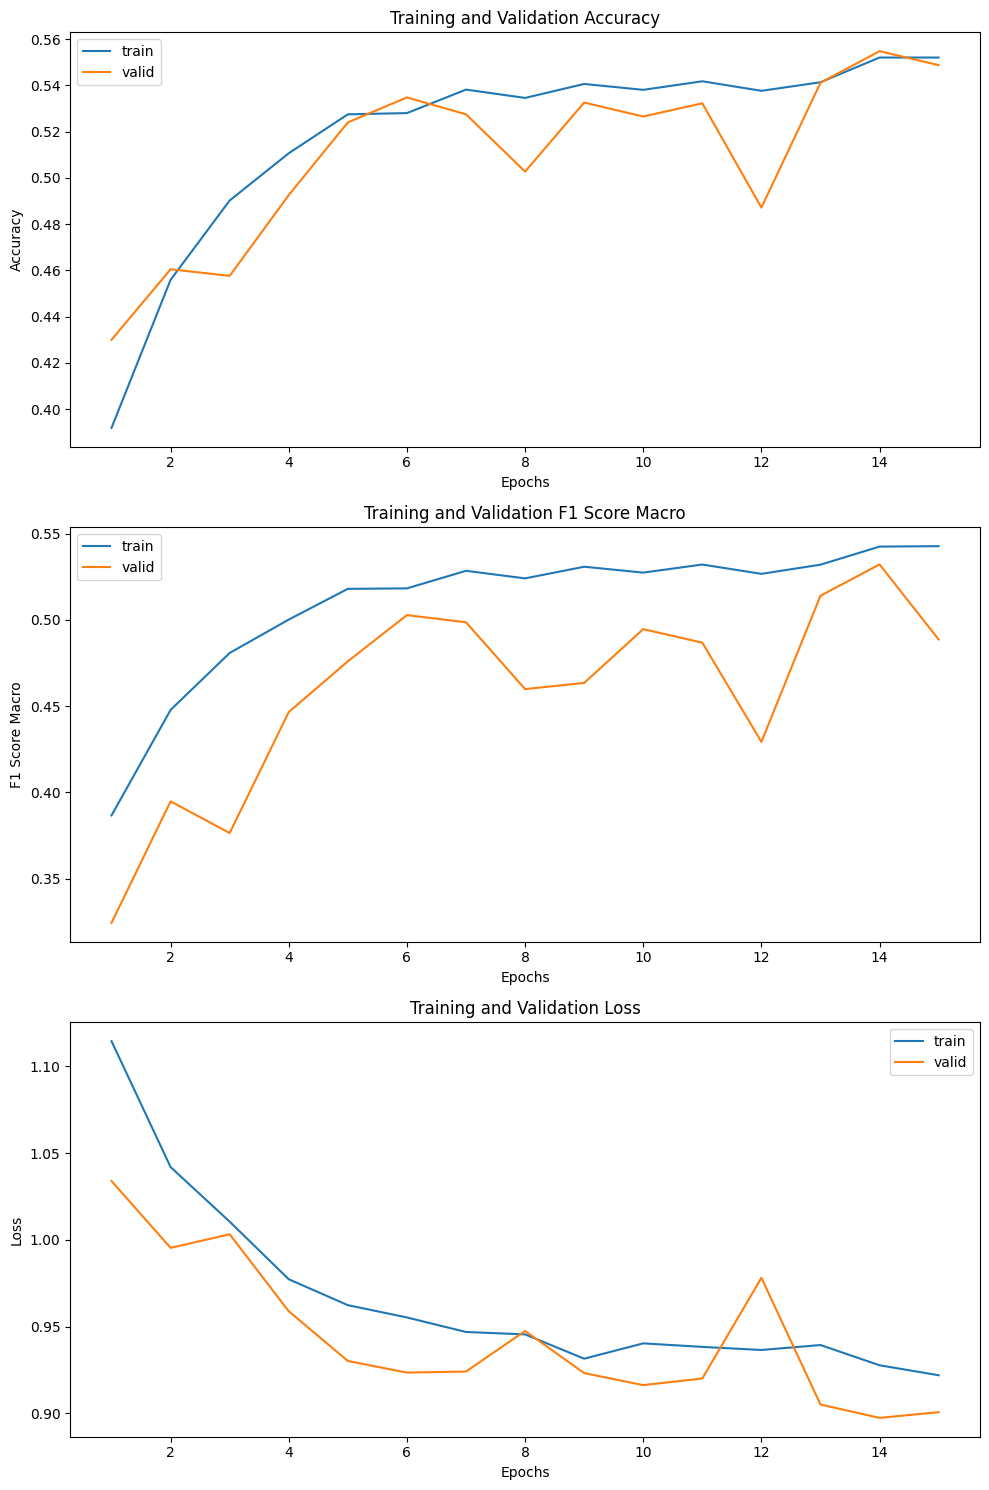

In [30]:
plot_train_metrics(history)

Podemos observar a priori que el modelo le presenta basta por aprender.Habria que probar con otra combinación de hiperparametros y regularizacion para ver si el modelo mejora, otra opción es usar este modelo como punto de partida para otro transfer learning y entrenando todos los capas de bert y dense. De igual manera, veamos como performa en test

In [31]:
y_hat_prob = model.predict(X_test)
print(y_hat_prob[:1]) # nuestro modelo predice que la clase mas probable es la 1
print(y_hat_prob[-1:]) # nuestro modelo predice que la clase mas probable es la 3

99/99 [==============================] - 35s 322ms/step
[[0.40290585 0.23494804 0.3621461 ]]
[[0.04866489 0.0950258  0.8563093 ]]


In [32]:
y_test[:1] # el modelo acertó

array([[1., 0., 0.]])

In [33]:
y_test[-1:] # el modelo acertó

array([[0., 0., 1.]])

In [34]:
scores=model.evaluate(X_test,y_test)
print("Acurracy:", scores[1])
print("F1 Score:", scores[2])

99/99 [==============================] - 35s 323ms/step - loss: 0.8847 - accuracy: 0.5619 - f1_score: 0.4993
Acurracy: 0.561904788017273
F1 Score: 0.49926915764808655


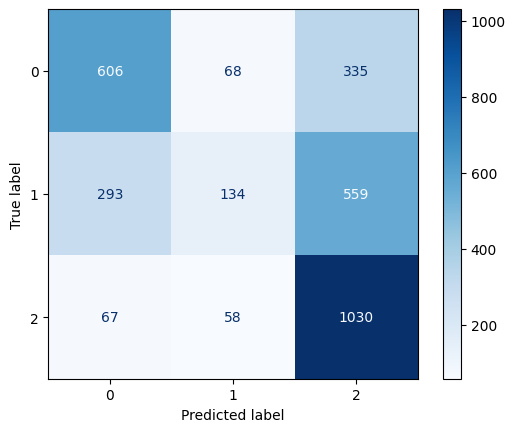

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponiendo que y_hat_prob tiene las probabilidades predichas
y_hat = np.argmax(y_hat_prob, axis=1)

# Generar la matriz de confusión
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Mostrar la matriz de confusión con 4 clases
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(3)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()



In [52]:
from sklearn.metrics import classification_report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir predicciones a etiquetas de clase

# Convertir y_test a etiquetas de clase
y_true = np.argmax(y_test, axis=1)  # Convertir y_test a etiquetas de clase

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred, target_names=['negative', 'neutral', 'positive'])
print(report)

99/99 [==============================] - 31s 317ms/step
              precision    recall  f1-score   support

    negative       0.63      0.60      0.61      1009
     neutral       0.52      0.14      0.22       986
    positive       0.54      0.89      0.67      1155

    accuracy                           0.56      3150
   macro avg       0.56      0.54      0.50      3150
weighted avg       0.56      0.56      0.51      3150



## Ensayos

In [42]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 139), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [43]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [45]:
class_names = ['negative', 'neutral', 'positive']

In [46]:
y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

1/1 [==============================] - 0s 114ms/step
Clasificación: positive


<ipython-input-46-339cf21b1202>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Clasificación:", class_names[int(y_prob)])


In [47]:
text = "I hate this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 139), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [48]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [49]:
y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

1/1 [==============================] - 0s 110ms/step
Clasificación: negative


<ipython-input-49-339cf21b1202>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Clasificación:", class_names[int(y_prob)])


## Conclusión

Luego de ver los resultados al evaluar el modelo, matriz de confusión y reporte de clasificación podemos concluir que el modelo tiene dificultades para clasificar sentimiento NEUTRALES, principalmente en la metrica recall, es decir dejar pasar muchas instancias verdaderas, en cambio para sentimientos POSITIVOS y NEGATIVOS el modelo mejora su performance notablemente. Se simularon ensayos negativos y positivos y la salida del modelo fue correcta.